### RNN to predict ETH price

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keyring

#import trend model functions
from trendmodel import *

# import robinhood functions
import robin_stocks.robinhood as r
from rh_account import *

In [23]:
# connect to robinhood account
login = r.login(keyring.get_password("robinhood","username"),keyring.get_password("robinhood","password"))

In [24]:
def get_historical_crypto(token, interval,span):
    
    # get price data from robinhood
    price_df = pd.DataFrame(r.crypto.get_crypto_historicals(token, interval=interval, span=span, bounds='24_7', info=None))
    
    return price_df
    

In [58]:
# get price data from robinhood
token = 'ETH'
interval = '5minute'
span = 'week'

price_df = get_historical_crypto(token, interval,span)
price_df.index = pd.to_datetime(price_df['begins_at'])
price_df.drop(['begins_at'], axis=1, inplace=True)
price_df['close_price'] = price_df['close_price'].astype('float')

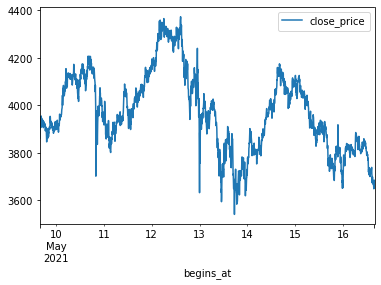

In [60]:
price_df.plot(y='close_price')